In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
# Graphs and Plotting related dependencies
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Plot stylesheet
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# Text preprocessing related libraries
import re
import nltk

In [2]:
# Reading data from the CSV file
job_data = pd.read_csv("input/jobs.csv", delimiter=",")

In [3]:
# Gist of data
job_data

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-11-26T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-11-26T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-11-26T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,424088,HOUSING PRESERVATION & DVLPMNT,External,1,Correspondence Coordinator,ASSOCIATE PUBLIC RECORDS OFFIC,60217,2,"Public Safety, Inspections, & Enforcement",F,...,"Salary range for this position is: $61,469 - $...",Apply Online.,NaN,100 Gold Street,NaN,New York City residency is generally required ...,2019-11-25T00:00:00.000,2019-12-09T00:00:00.000,2019-11-25T00:00:00.000,2019-11-26T00:00:00.000
3016,424096,HOUSING PRESERVATION & DVLPMNT,External,1,CODE-LEAD Clerical Support,COMMUNITY ASSOCIATE,56057,0,Administration & Human Resources,F,...,NaN,Apply Online.,NaN,"105 East 106 Street, New York,",NaN,New York City residency is generally required ...,2019-11-25T00:00:00.000,2019-12-06T00:00:00.000,2019-11-25T00:00:00.000,2019-11-26T00:00:00.000
3017,424096,HOUSING PRESERVATION & DVLPMNT,Internal,1,CODE-LEAD Clerical Support,COMMUNITY ASSOCIATE,56057,0,Administration & Human Resources,F,...,NaN,Apply Online.,NaN,"105 East 106 Street, New York,",NaN,New York City residency is generally required ...,2019-11-25T00:00:00.000,2019-12-06T00:00:00.000,2019-11-25T00:00:00.000,2019-11-26T00:00:00.000
3018,424117,HUMAN RIGHTS COMMISSION,Internal,1,BRONX CSC DIRECTOR,PRINICIPAL HUMAN RIGHTS SPECIA,55077,0,Constituent Services & Community Programs Soci...,F,...,NaN,For City employees: Go to Employee Self-Servic...,"DAY, 9-5; ON OCCASION, CANDIDATES WILL BE REQU...",1932 Arthur Ave 2Nd Flr Bronx,NaN,New York City residency is generally required ...,2019-11-25T00:00:00.000,NaN,2019-11-25T00:00:00.000,2019-11-26T00:00:00.000


In [4]:
job_data.profile_report(style={'full_width':True},correlations={'phi_k':True,'cramers':False,'pearson':False,'spearman':False,'kendall':False,'recoded':False})

Assigning appropriate field types 

In [5]:
## Date Columns
# Casting the date fields from string to datetime
job_data['Posting_Date']        = pd.to_datetime(job_data['Posting_Date'])
job_data['Process_Date']        = pd.to_datetime(job_data['Process_Date'])
job_data['Post_Until']          = pd.to_datetime(job_data['Post_Until'])
job_data['Posting_Updated']     = pd.to_datetime(job_data['Posting_Updated'])



In [6]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 28 columns):
Job_ID                           3020 non-null int64
Agency                           3020 non-null object
Posting_Type                     3020 non-null object
#_Of_Positions                   3020 non-null int64
Business_Title                   3020 non-null object
Civil_Service_Title              3020 non-null object
Title_Code_No                    3020 non-null object
Level                            3020 non-null object
Job_Category                     3018 non-null object
Full-Time/Part-Time_indicator    2811 non-null object
Salary_Range_From                3020 non-null float64
Salary_Range_To                  3020 non-null float64
Salary_Frequency                 3020 non-null object
Work_Location                    3020 non-null object
Division/Work_Unit               3020 non-null object
Job_Description                  3020 non-null object
Minimum_Qual_Requirements    

In [7]:

job_data.describe()

,Job_ID,#_Of_Positions,Salary_Range_From,Salary_Range_To,Recruitment_Contact
count,3020.000000,3020.000000,3020.000000,3020.000000,0.0
mean,383678.501987,2.424172,58140.495550,84325.707875,NaN
std,51779.379258,8.149189,26806.810446,43186.883961,NaN
min,87990.000000,1.000000,0.000000,10.360000,NaN
25%,378264.750000,1.000000,48535.000000,60990.000000,NaN
50%,402960.500000,1.000000,57944.000000,81535.000000,NaN
75%,415741.000000,1.000000,72476.000000,105000.000000,NaN
max,424117.000000,190.000000,218587.000000,234402.000000,NaN


From the requirement doc we need to find below items. 
1. Skills
2. Skills Vs Salary in (dec order)
3. Job Category
4. Job Category belong to Skills
5. Year of Exp
6. Salary-Range Vs Job-Category Vs Year of Exp

In terms of dataset column names
1. `Preferred_Skills` , `Minimum_Qual_Requirements`
2. (`Salary_Range_From`, `Salary_Range_To`, `Salary_Frequency`) vs `Preferred_Skills`

#### Questions to figureout.

1. Salray from/to Vs Salary frequency 

In [8]:
import seaborn as sns


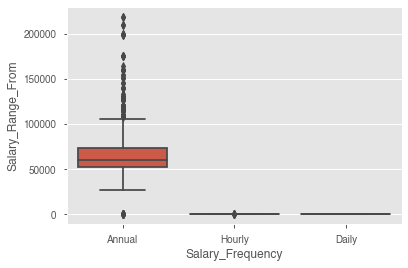

In [9]:
sns.boxplot(x='Salary_Frequency',y='Salary_Range_From', data=job_data)
plt.show()

In [10]:
job_data[job_data['Salary_Frequency'] == 'Hourly']['Salary_Range_From'].describe()

count    216.000000
mean      27.139398
std       14.847692
min        8.750000
25%       15.500000
50%       20.370600
75%       34.630000
max       73.370000
Name: Salary_Range_From, dtype: float64

In [11]:
job_data[job_data['Salary_Frequency'] == 'Daily']['Salary_Range_From'].describe()

count     46.000000
mean     332.431957
std       86.970303
min      175.100000
25%      277.040000
50%      342.540000
75%      373.030000
max      501.920000
Name: Salary_Range_From, dtype: float64

In [12]:
job_data[job_data['Salary_Frequency'] == 'Annual']['Salary_Range_From'].describe()

count      2758.000000
mean      63655.961777
std       20883.465495
min           0.000000
25%       52000.000000
50%       60433.000000
75%       73938.000000
max      218587.000000
Name: Salary_Range_From, dtype: float64

Clearly salary_range_from is dependend on salary frequency . Hence try to project, daily and hourly salary in ters of monthly

Daily - 8 hrs 
Monthly - 20 days 
Annual  - 12 Months

In [13]:
def project_salary_to_annual(freq,salary):
    if (freq == 'Hourly'):
        return salary * 8 * 20 * 12
    elif (freq == 'Daily'):
        return salary * 20 * 12    
    else :
        return salary
    

In [14]:
job_data['Projected_Salary_From'] = job_data.apply(lambda x: project_salary_to_annual(x.Salary_Frequency, x.Salary_Range_From), axis=1)
job_data['Projected_Salary_To'] = job_data.apply(lambda x: project_salary_to_annual(x.Salary_Frequency, x.Salary_Range_To), axis=1)

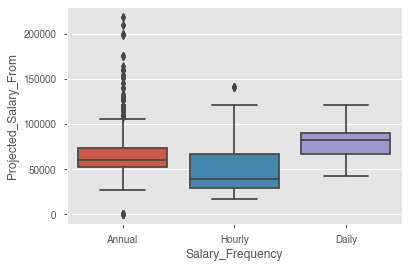

In [15]:
sns.boxplot(x='Salary_Frequency',y='Projected_Salary_From', data=job_data)
plt.show()

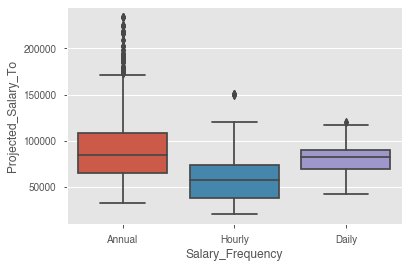

In [16]:
sns.boxplot(x='Salary_Frequency',y='Projected_Salary_To', data=job_data)
plt.show()

### Removing Null - detailed steps in Venki NB

In [17]:
# Identifying suitable variables based on the percentage of null values and the data type

null_limit = job_data.shape[0] * 0.3 # Minimum # number of records without null or NaN values
identified_cols = list()

data_with_null = job_data.isnull().sum() # Columns with null value count
try:
    for items in data_with_null.iteritems(): # Iterate through the pd.Series object
        if items[1] < null_limit:
            if job_data[items[0]].dtype in ('int64','object','float64'):
                identified_cols.append(items[0])
except ValueError as ve:
    pass

print("Identified variables:\n{0}".format(identified_cols))

Identified variables:
['Job_ID', 'Agency', 'Posting_Type', '#_Of_Positions', 'Business_Title', 'Civil_Service_Title', 'Title_Code_No', 'Level', 'Job_Category', 'Full-Time/Part-Time_indicator', 'Salary_Range_From', 'Salary_Range_To', 'Salary_Frequency', 'Work_Location', 'Division/Work_Unit', 'Job_Description', 'Minimum_Qual_Requirements', 'Preferred_Skills', 'To_Apply', 'Residency_Requirement', 'Projected_Salary_From', 'Projected_Salary_To']


In [18]:
def plot_null_data(dframe):
    # Figure size
    sns.set(rc={'figure.figsize':(9,8)})
    ax = sns.heatmap(dframe.isnull(), cbar=False)
    ax.set_title("Dataset columns with null values")

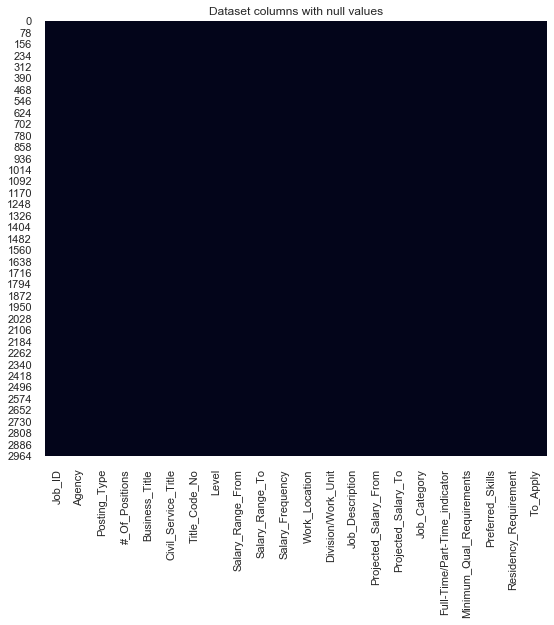

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
nan_cols = ['Job_Category', 'Full-Time/Part-Time_indicator','Minimum_Qual_Requirements', 'Preferred_Skills','Residency_Requirement', 'To_Apply']
cols = [col for col in identified_cols if col not in nan_cols]

# print(cols)
# Apply the imputation on the dataset
imputed_data = pd.DataFrame(imputer.fit_transform(job_data[nan_cols]), columns=nan_cols)

# # imputed_data.head()
posting_data = pd.concat([job_data[cols], imputed_data], axis=1)
# Empty values plot
# combined_data.isnull().sum()
plot_null_data(posting_data)

Text pre-processing - detailed in venki nb

In [28]:
'''
    Cleanse the special characters, white space and punctuations.
'''
def cleanse_text_impurities(text_val):
    try:
        # remove the special characters
        text_val = re.sub(r'[^a-zA-Z\s]', '', text_val, re.I|re.A)
        text_val = text_val.strip()
        
        return text_val
    except ValueError as ve:
        print("Error while cleasing the data: {0}".format(ve))
'''
    Removes the english language stop words
''' 
def remove_stopwords(text_val):
    try:
        word_tokenizer = nltk.WordPunctTokenizer()
        stopwords = nltk.corpus.stopwords.words("english")
        text_val = text_val.lower()
        # tokenize the sentences
        tokens = word_tokenizer.tokenize(text_val)
        
        # Filter stop words 
        filtered_tokens = [tok for tok in tokens if tok not in stopwords]
        
        return ' '.join(filtered_tokens)
        
    except ValueError as ve:
        print("Error while cleasing the data: {0}".format(ve))

In [29]:
str_cols = ['Job_Description', 'Full-Time/Part-Time_indicator', 'Minimum_Qual_Requirements','Preferred_Skills','Residency_Requirement']

# Iterate through the dataframe and apply the cleansing function
for col in str_cols:
    posting_data[col] = posting_data[col].apply(cleanse_text_impurities)


posting_data[str_cols]

,Job_Description,Full-Time/Part-Time_indicator,Minimum_Qual_Requirements,Preferred_Skills,Residency_Requirement
0,Division of Economic Financial Opportunity DE...,F,A baccalaureate degree from an accredited coll...,Excellent interpersonal and organizational ski...,New York City residency is generally required ...
1,The New York City Department of Small Business...,F,A baccalaureate degree from an accredited coll...,ERROR NAME,New York City residency is generally required ...
2,Under direct supervision assist in the routine...,F,Three years of fulltime satisfactory experienc...,A High School Diploma or GED CDL Drivers Li...,NYCHA has no residency requirements
3,Under direct supervision assist in the routine...,F,Three years of fulltime satisfactory experienc...,A High School Diploma or GED CDL Drivers Li...,NYCHA has no residency requirements
4,Responsibilities of selected candidates will i...,F,Five years of fulltime satisfactory experience...,ERROR NAME,NYCHA has no residency requirement
...,...,...,...,...,...
3015,The City of New York Department of Housing Pre...,F,A masters degree from an accredited college in...,Excellent judgment editing writing and interpe...,New York City residency is generally required ...
3016,Your Team The Office of Enforcement and Neigh...,F,Qualification Requirements High school gradu...,Must possess excellent written and verbal comm...,New York City residency is generally required ...
3017,Your Team The Office of Enforcement and Neigh...,F,Qualification Requirements High school gradu...,Must possess excellent written and verbal comm...,New York City residency is generally required ...
3018,The Commission on Human Rights the Commission ...,F,A baccalaureate degree issued after completion...,Advanced working proficiency in Microsoft Offi...,New York City residency is generally required ...


### Remove stopwords

In [30]:
for col in str_cols:
    posting_data[col+'new'] = posting_data[col].apply(remove_stopwords)

### Tertra Gram 

In [31]:
posting_data['Preferred_Skills_tetra'] = posting_data['Preferred_Skillsnew'].apply(tetragram)

### Tri gram

In [32]:
posting_data['Preferred_Skills_tri'] = posting_data['Preferred_Skillsnew'].apply(trigram)

In [55]:
posting_data['Preferred_Skills_bi'] = posting_data['Preferred_Skillsnew'].apply(bigram)

In [33]:
posting_data['Preferred_Skills_tetra']

0       [excellent_interpersonal_organizational_skills...
1                                                      []
2       [high_school_diploma_ged, school_diploma_ged_c...
3       [high_school_diploma_ged, school_diploma_ged_c...
4                                                      []
                              ...                        
3015    [excellent_judgment_editing_writing, judgment_...
3016    [must_possess_excellent_written, possess_excel...
3017    [must_possess_excellent_written, possess_excel...
3018    [advanced_working_proficiency_microsoft, worki...
3019    [advanced_working_proficiency_microsoft, worki...
Name: Preferred_Skills_tetra, Length: 3020, dtype: object

In [34]:
gram=tetragram(str(posting_data['Preferred_Skillsnew'].iloc[2]))
for g in gram:
    print(g)

high_school_diploma_ged
school_diploma_ged_cdl
diploma_ged_cdl_drivers
ged_cdl_drivers_license
cdl_drivers_license_excellent
drivers_license_excellent_troubleshooting
license_excellent_troubleshooting_ability
excellent_troubleshooting_ability_mechanical
troubleshooting_ability_mechanical_aptitude
ability_mechanical_aptitude_excellent
mechanical_aptitude_excellent_analytical
aptitude_excellent_analytical_organizational
excellent_analytical_organizational_skills
analytical_organizational_skills_ability
organizational_skills_ability_troubleshoot
skills_ability_troubleshoot_various
ability_troubleshoot_various_types
troubleshoot_various_types_vacuum
various_types_vacuum_heating
types_vacuum_heating_equipment
vacuum_heating_equipment_knowledge
heating_equipment_knowledge_steam
equipment_knowledge_steam_pneumatic
knowledge_steam_pneumatic_heating
steam_pneumatic_heating_systems
pneumatic_heating_systems_steam
heating_systems_steam_hot
systems_steam_hot_water
steam_hot_water_generating
hot_wa

In [70]:
sub_df = posting_data[['Preferred_Skills_tri', 'Projected_Salary_To']].copy()

In [71]:
df =sub_df.explode('Preferred_Skills_tri').groupby('Preferred_Skills_tri').agg(
max_salary=('Projected_Salary_To', max),
sum_salary=('Projected_Salary_To', sum ),
cnt_salary=('Projected_Salary_To', 'count') ).sort_values(['max_salary','sum_salary','cnt_salary'], ascending=False)

In [37]:
sub_df = posting_data[['Preferred_Skills_tetra', 'Projected_Salary_From']].copy()

In [38]:
df = sub_df.explode('Preferred_Skills_tetra').groupby('Preferred_Skills_tetra').agg(
max_salary=('Projected_Salary_From', max),
sum_salary=('Projected_Salary_From', sum ),
cnt_salary=('Projected_Salary_From', 'count') ).sort_values(['max_salary','sum_salary','cnt_salary'], ascending=False)

In [72]:
df['Average_Salary'] = df['sum_salary']/df['cnt_salary']
df = df[df['cnt_salary'] >=4 ].sort_values(['Average_Salary'], ascending=False)

In [73]:
df

,max_salary,sum_salary,cnt_salary,Average_Salary
Preferred_Skills_tri,,,,
estate_asset_management,224749.0,1318474.0,6,219745.666667
capacity_building_proven,224749.0,1318474.0,6,219745.666667
building_proven_leader,224749.0,1318474.0,6,219745.666667
broad_variety_real,224749.0,1318474.0,6,219745.666667
audience_experience_engaging,224749.0,1318474.0,6,219745.666667
...,...,...,...,...
candidates_technology_related,29760.0,119040.0,4,29760.000000
components_knowledge_differentiate,29760.0,119040.0,4,29760.000000
computer_components_ability,29760.0,119040.0,4,29760.000000


In [74]:
df.to_csv('./res.csv')

In [60]:
sub_df = posting_data[['Preferred_Skills_bi', 'Projected_Salary_To']].copy()

In [62]:
df = sub_df.explode('Preferred_Skills_bi').groupby('Preferred_Skills_bi').agg(
max_salary=('Projected_Salary_To', max),
sum_salary=('Projected_Salary_To', sum ),
cnt_salary=('Projected_Salary_To', 'count') ).sort_values(['max_salary','sum_salary','cnt_salary'], ascending=False)

In [63]:
df['Average_Salary'] = df['sum_salary']/df['cnt_salary']
df = df[df['cnt_salary'] >=4 ].sort_values(['Average_Salary'], ascending=False)

In [64]:
df

,max_salary,sum_salary,cnt_salary,Average_Salary
Preferred_Skills_bi,,,,
private_developers,224749.0,1318474.0,6,219745.666667
ethic_solutionsdriven,224749.0,1318474.0,6,219745.666667
team_individual,224749.0,1318474.0,6,219745.666667
strategic_communicator,224749.0,1318474.0,6,219745.666667
stakeholders_community,224749.0,1318474.0,6,219745.666667
...,...,...,...,...
andor_replace,29760.0,119040.0,4,29760.000000
ability_repair,29760.0,119040.0,4,29760.000000
ability_install,29760.0,119040.0,4,29760.000000


('A', 'High', 'School', 'Diploma')
('High', 'School', 'Diploma', 'GED')
('School', 'Diploma', 'GED', 'CDL')
('Diploma', 'GED', 'CDL', 'Drivers')
('GED', 'CDL', 'Drivers', 'License')
('CDL', 'Drivers', 'License', 'Excellent')
('Drivers', 'License', 'Excellent', 'troubleshooting')
('License', 'Excellent', 'troubleshooting', 'ability')
('Excellent', 'troubleshooting', 'ability', 'mechanical')
('troubleshooting', 'ability', 'mechanical', 'aptitude')
('ability', 'mechanical', 'aptitude', 'Excellent')
('mechanical', 'aptitude', 'Excellent', 'analytical')
('aptitude', 'Excellent', 'analytical', 'organizational')
('Excellent', 'analytical', 'organizational', 'skills')
('analytical', 'organizational', 'skills', 'Ability')
('organizational', 'skills', 'Ability', 'troubleshoot')
('skills', 'Ability', 'troubleshoot', 'various')
('Ability', 'troubleshoot', 'various', 'types')
('troubleshoot', 'various', 'types', 'vacuum')
('various', 'types', 'vacuum', 'heating')
('types', 'vacuum', 'heating', 'equ

In [74]:
summarize(txt)

''

In [23]:
from nltk import ngrams
def bigram(sentence):
    grams = ngrams(sentence.split(), 2)
    return [ gram[0]+'_'+gram[1]  for gram in grams ]

def trigram(sentence):
    grams = ngrams(sentence.split(), 3)
    return [ gram[0]+'_'+gram[1]+'_'+gram[2]  for gram in grams ]

def tetragram(sentence):
    grams = ngrams(sentence.split(), 4)
    return [ gram[0]+'_'+gram[1]+'_'+gram[2]+'_'+gram[3]  for gram in grams ]
    
def pentagram(sentence):
    grams = ngrams(sentence.split(), 5)
    return [ gram[0]+'_'+gram[1]+'_'+gram[2]+'_'+gram[3]+'_'+gram[4]  for gram in grams ]

In [169]:
txt=str(posting_data['Preferred_Skillsnew'].iloc[2])
grams = ngrams(txt.split(), 5)

### Preferred_Skills 

In [40]:
posting_data['Preferred_Skills']

0       Excellent interpersonal organizational skills ...
1                                              ERROR NAME
2       A High School Diploma GED CDL Drivers License ...
3       A High School Diploma GED CDL Drivers License ...
4                                              ERROR NAME
                              ...                        
3015    Excellent judgment editing writing interperson...
3016    Must possess excellent written verbal communic...
3017    Must possess excellent written verbal communic...
3018    Advanced working proficiency Microsoft Office ...
3019    Advanced working proficiency Microsoft Office ...
Name: Preferred_Skillsnew, Length: 3020, dtype: object

In [29]:
from gensim.summarization import summarize

In [28]:
!pip install gensim

     |████████████████████████████████| 24.7MB 1.8MB/s eta 0:00:01
     |████████████████████████████████| 71kB 2.4MB/s eta 0:00:01
     |████████████████████████████████| 133kB 2.4MB/s eta 0:00:01
     |████████████████████████████████| 71kB 4.2MB/s eta 0:00:011
     |████████████████████████████████| 5.8MB 1.8MB/s eta 0:00:011
  Created wheel for smart-open: filename=smart_open-1.9.0-cp37-none-any.whl size=73088 sha256=bea794de2fb3229f0c099436a48f41709b0bea5858df6bafb6693d16b316f4be
  Stored in directory: /Users/sindhiyabalakavin/Library/Caches/pip/wheels/ab/10/93/5cff86f5b721d77edaecc29959b1c60d894be1f66d91407d28
Successfully built smart-open


In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sindhiyabalakavin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True